##### Author: Weisi Chen
##### Last update: 1 May 2023

In [1]:
# Importing necessary Python libraries for this exercise
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
import io
from top2vec import Top2Vec

### Function to read one AFR XML file

In [2]:
# The function to read AFR news from a given XML file
# selected_type is an optional option that generates a filtered table by the news type;
# The value can be one of the following: 
#       'Domain Prestige', 'Companies and Markets', 'News',
#       'Chanticleer', 'Perspective', 'Weekend Fin', 'Opinion',
#       'Stock Tables', 'Smart Investor', 'Poster', 'World', 'Market Wrap',
#       'Property', 'Features', 'Life & Leisure', 'Financial Services',
#       'Review', 'Accounting', 'Marketing & Media', 'Education',
#       'Saleroom', 'Computers', 'Supplement'

def read_afr(xml_file, selected_type = ""):
    xtree = et.parse(xml_file)
    dates_all = []
    news_texts_all = []
    headlines_all = []
    sections_all = []

    for node in xtree.iter('TEXT'):
        news_text = ""
        for subnode in node.iter('p'):
            whole = subnode.itertext()
            for parts in whole:
                news_text += parts
        news_texts_all.append(news_text)

    for node in xtree.iter('SECTION'):
        sections_all.append(node.text)
        
    for node in xtree.iter('PUBLICATIONDATE'):
        dates_all.append(node.text)
        
    # print(len(headlines_all), len(dates_all), len(news_texts_all))
    news_df = pd.DataFrame(
        {'date': dates_all,
         # 'headline': headlines_all,
         'text': news_texts_all,
         'section': sections_all})
    
    if(selected_type):
        print("Selected News Types: ", selected_type)
        news_df = news_df.loc[news_df['section'] == selected_type]
    
    return news_df

### Read all XML files within a folder

In [3]:
import glob

filenames = sorted(glob.glob('./data/AFR*.xml'))
# filenames = filenames[0:3]
docs = []
news = pd.DataFrame()

for filename in filenames:
    print(filename)
    temp = read_afr(filename, "Companies and Markets")
    news = pd.concat([news,temp], axis=0)
    # docs = docs + news['text'].values.tolist()
    
docs = news['text'].values.tolist()  
print("The total data size is: ", len(docs), ".")

./data\AFR_20150101-20150131.xml
Selected News Types:  Companies and Markets
./data\AFR_20150201-20150228.xml
Selected News Types:  Companies and Markets
./data\AFR_20150301-20150331.xml
Selected News Types:  Companies and Markets
./data\AFR_20150401-20150430.xml
Selected News Types:  Companies and Markets
./data\AFR_20150501-20150531.xml
Selected News Types:  Companies and Markets
./data\AFR_20150601-20150630.xml
Selected News Types:  Companies and Markets
./data\AFR_20150701-20150731.xml
Selected News Types:  Companies and Markets
./data\AFR_20150801-20150831.xml
Selected News Types:  Companies and Markets
./data\AFR_20150901-20150930.xml
Selected News Types:  Companies and Markets
./data\AFR_20151001-20151031.xml
Selected News Types:  Companies and Markets
./data\AFR_20151101-20151130.xml
Selected News Types:  Companies and Markets
./data\AFR_20151201-20151231.xml
Selected News Types:  Companies and Markets
./data\AFR_20160101-20160131.xml
Selected News Types:  Companies and Markets

In [4]:
news

,date,text,section
3,20150131,BC Iron managing director Morgan Ball says he ...,Companies and Markets
4,20150131,"Australia's biggest gold miner, Newcrest Minin...",Companies and Markets
5,20150131,Purchase gives Snowy a vital stake in the elec...,Companies and Markets
23,20150131,The Wiggins Island Coal Export ­Terminal will ...,Companies and Markets
24,20150131,Seven Group Holdings has positioned itself to ...,Companies and Markets
...,...,...,...
2583,20211201,This content is produced by The Australian Fin...,Companies and Markets
2584,20211201,Andrew Forrest's LNG import venture in Port Ke...,Companies and Markets
2585,20211201,New York | Rising COVID-19 cases and the new o...,Companies and Markets
2586,20211201,"Cambridge, Massachusetts | The chief executive...",Companies and Markets


### Code for Top2Vec

In [17]:
import time
start_time = time.time()
topic_model = Top2Vec(docs)
# topics, probs = topic_model.fit_transform(docs)
print("--- %s seconds ---" % (time.time() - start_time))

topic_model.save("top2vec_model")

2023-04-22 13:23:38,050 - top2vec - INFO - Pre-processing documents for training
2023-04-22 13:24:16,602 - top2vec - INFO - Creating joint document/word embedding
2023-04-22 14:18:26,185 - top2vec - INFO - Creating lower dimension embedding of documents
2023-04-22 14:18:55,622 - top2vec - INFO - Finding dense areas of documents
2023-04-22 14:18:58,232 - top2vec - INFO - Finding topics


--- 3321.4992759227753 seconds ---


In [4]:
topic_model = Top2Vec.load("top2vec_model")

In [5]:
topic_model.get_num_topics()

444

In [6]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()
# print(topic_sizes, topic_nums)

In [7]:
topic_words, word_scores, topic_nums = topic_model.get_topics(444)
topic_words

array([['advancers', 'hldgs', 'res', ..., 'orocobre', 'cdi', 'evolution'],
       ['steadyoil', 'steady', 'hang', ..., 'currencies', 'convention',
        'overnight'],
       ['economists', 'rba', 'inflation', ..., 'yellen', 'cpi', 'wages'],
       ...,
       ['sai', 'baring', 'assurance', ..., 'dental', 'tesco', 'embarked'],
       ['panaust', 'gram', 'guangdong', ..., 'hony', 'panoramic',
        'xstrata'],
       ['dreamworld', 'ardent', 'parks', ..., 'resort', 'occupancy',
        'mantra']], dtype='<U15')

In [13]:
pd.DataFrame(topic_words).to_csv("top2vec_topics.csv")

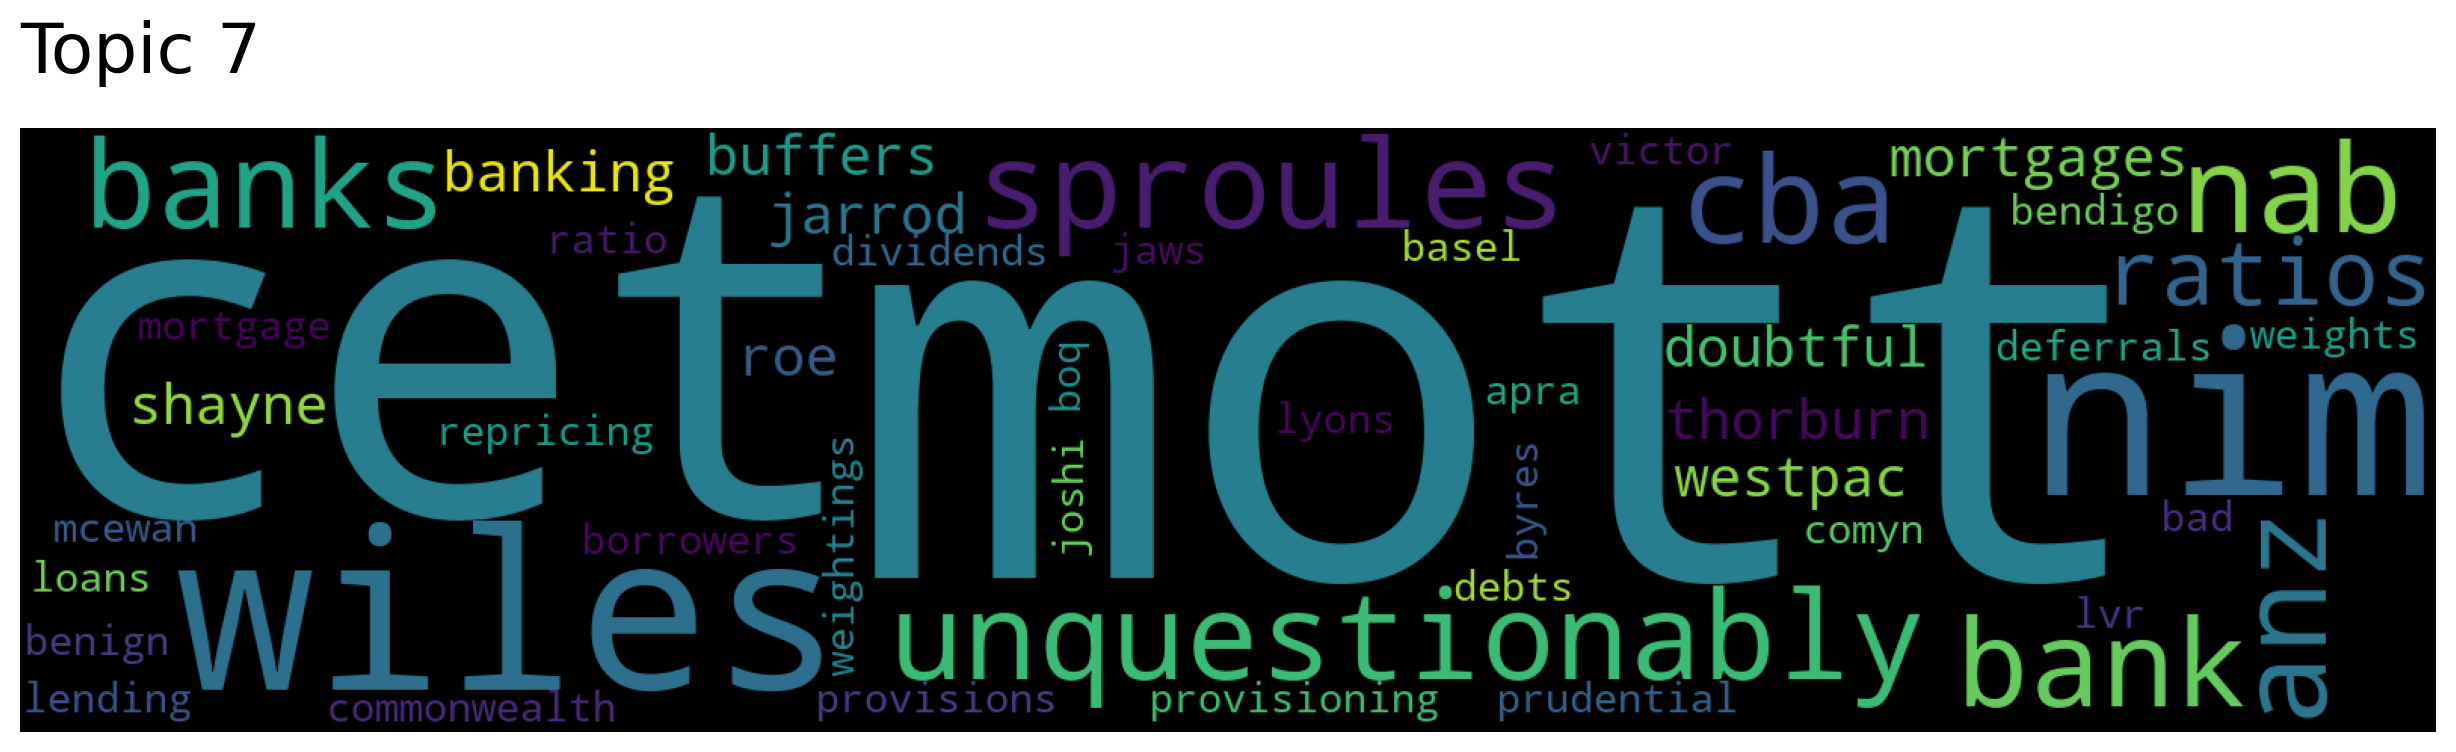

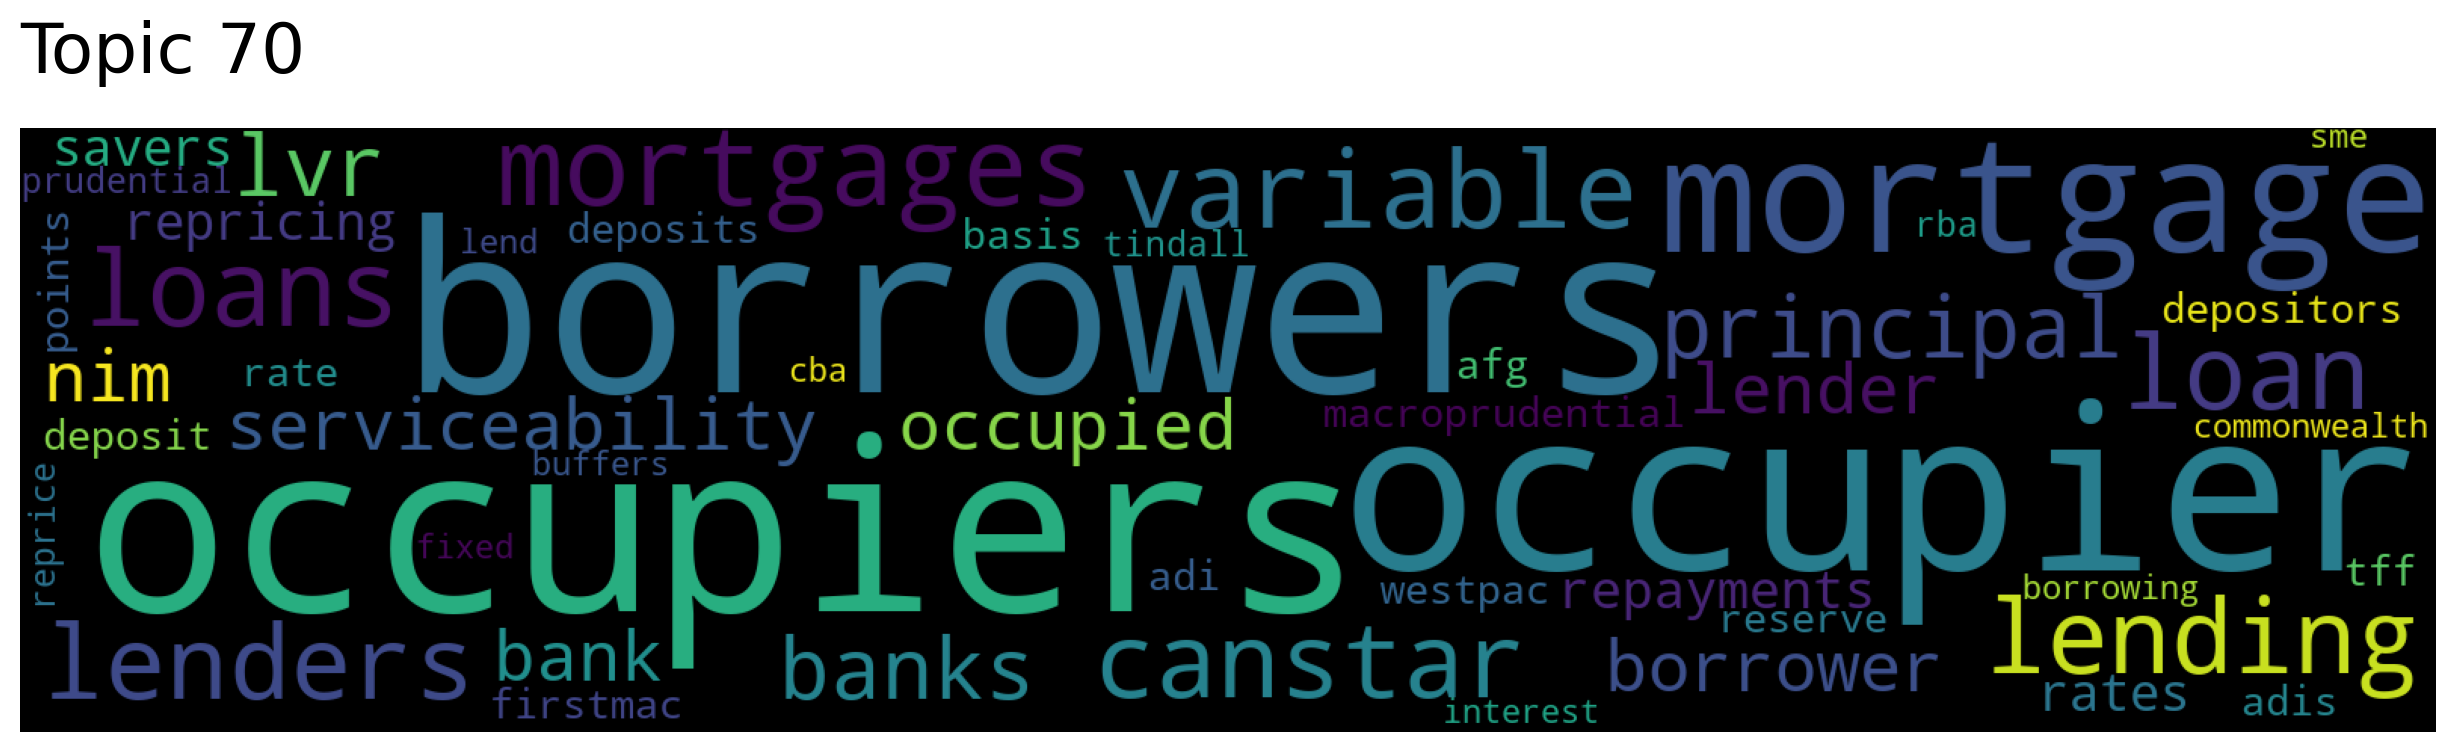

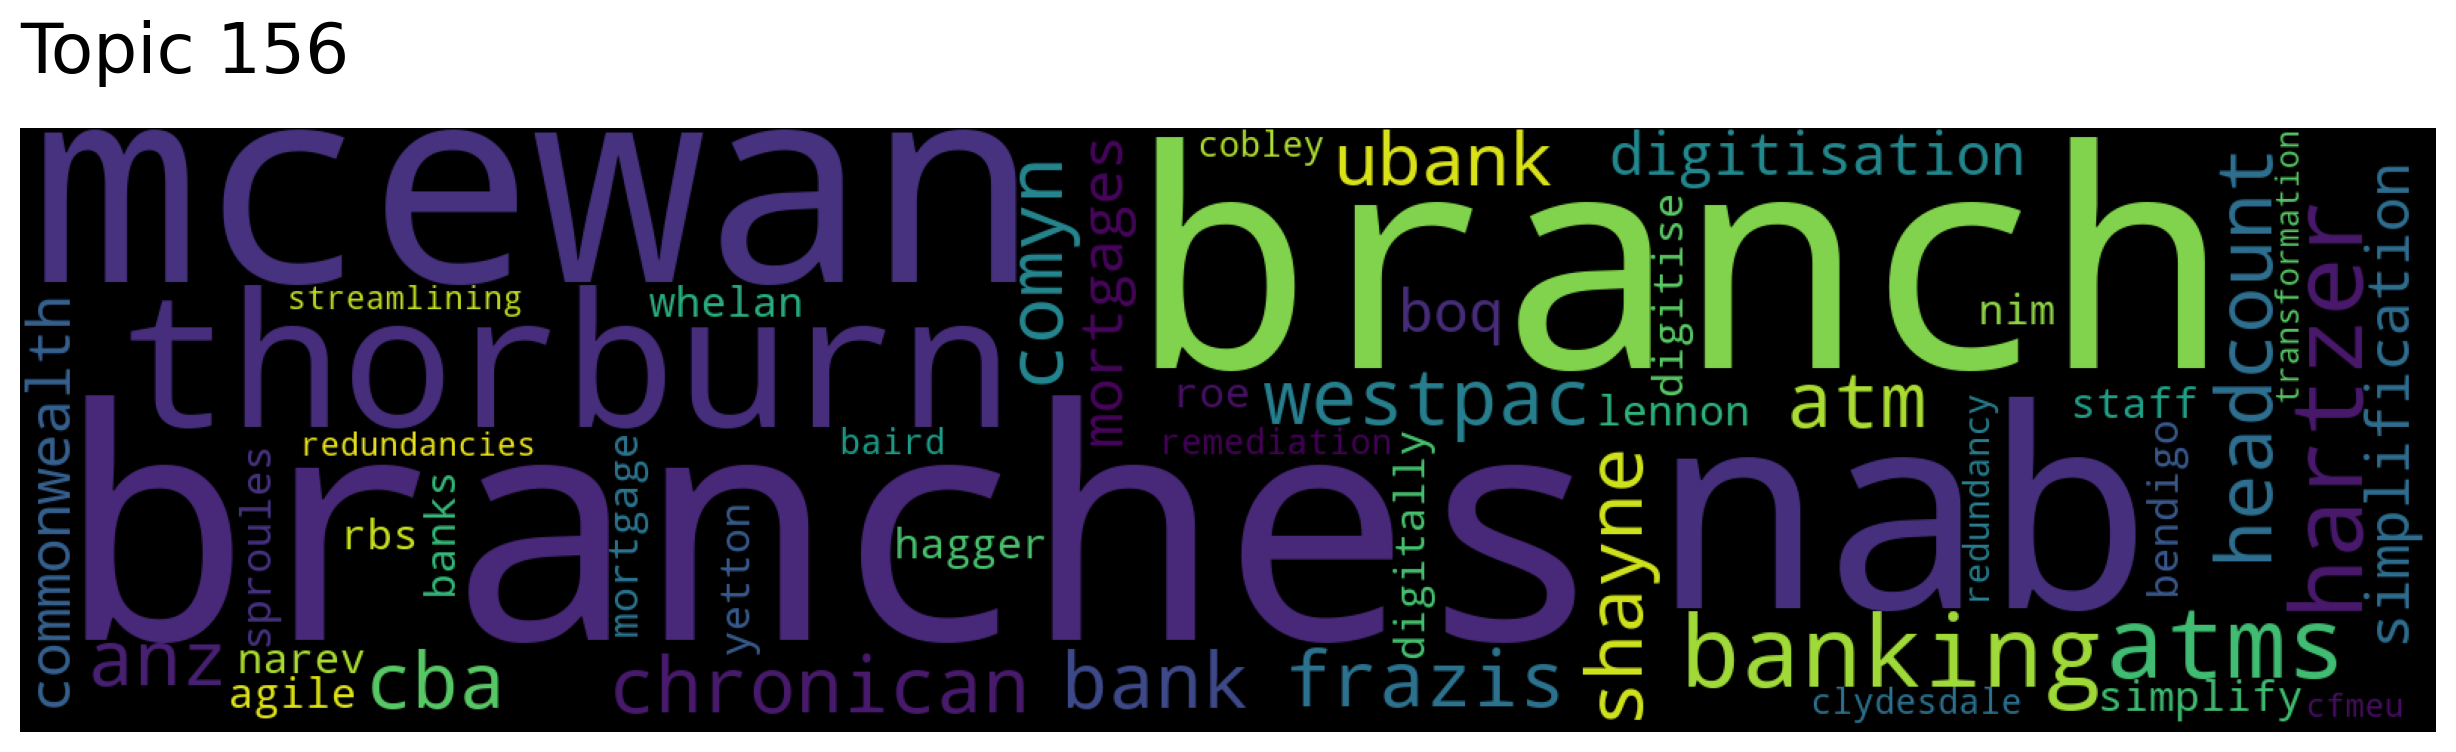

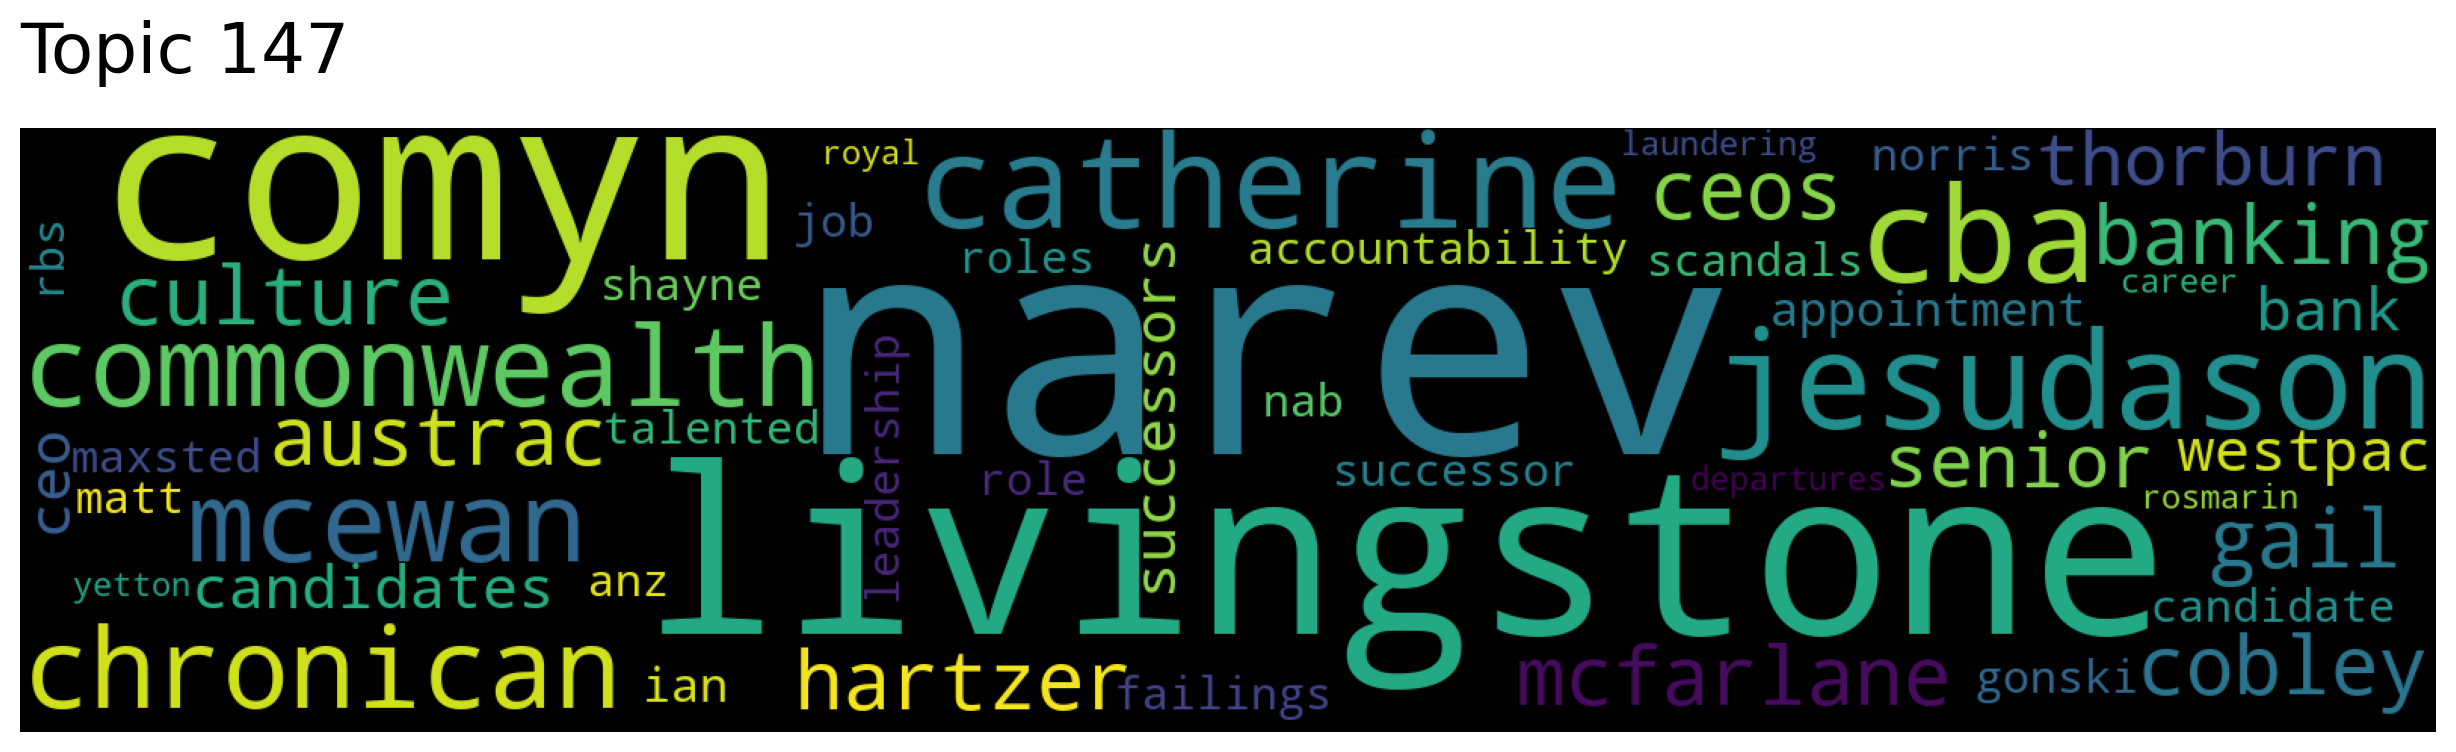

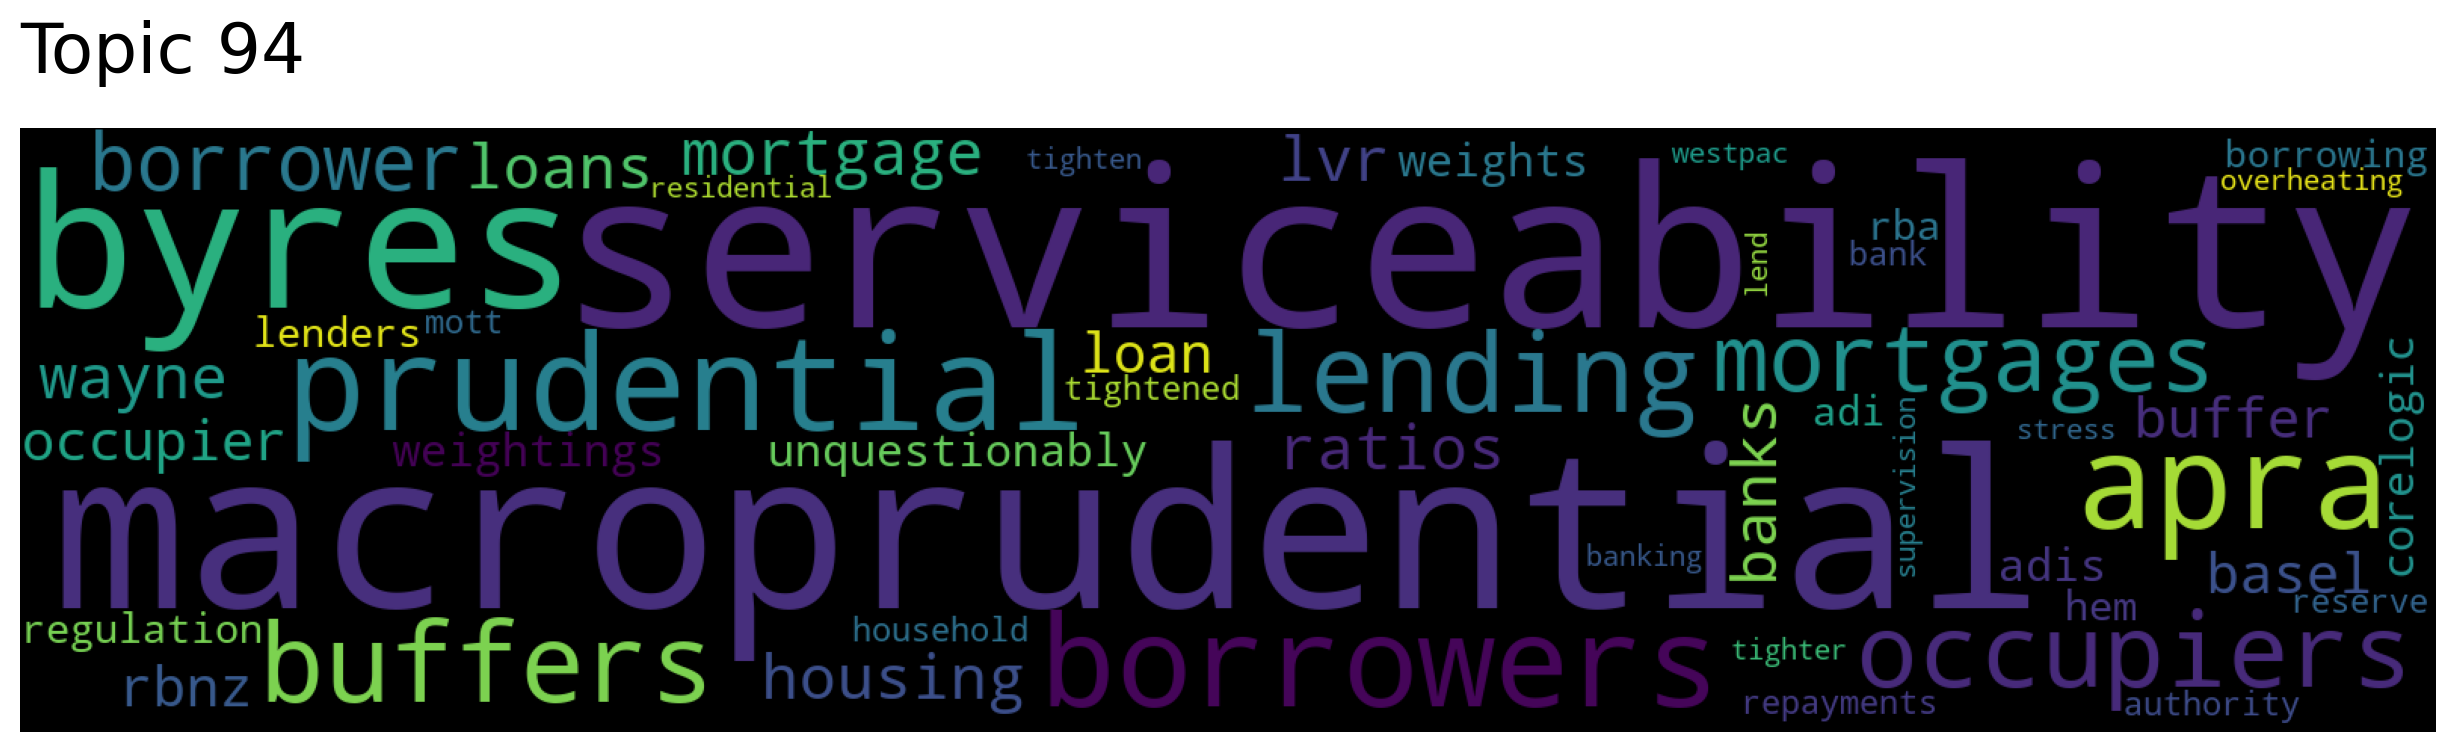

In [26]:
#topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["bank"], num_topics=5)
#for topic in topic_nums:
#    topic_model.generate_topic_wordcloud(topic)

In [16]:
documents, document_scores, document_ids = topic_model.search_documents_by_topic(topic_num=147, num_docs=5)

In [17]:
documents, document_scores, document_ids = topic_model.search_documents_by_keywords(keywords=["westpac", "bank"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 3845, Score: 0.4547403156757355
-----------
Westpac Banking Corp is planning to lift its dividend next year despite the regulatory headwinds battering the banking sector that have forced it to raise $3.5 billion in new capital.With the sustainability of bank dividends the focus of several analyst reports in recent weeks, Westpac said on Wednesday there would be no change to its dividend approach.Announcing preliminary full-year results to coincide with the capital raising, the bank said it would pay a fully franked 94¢ final dividend, up 1¢ on the interim dividend and 2¢ higher than the final dividend for the 2014 year."We are sticking with our current dividend approach of seeking to steadily increase dividends, within the context of a sustainable payout ratio," chief executive Brian Hartzer told analysts on a conference call.Morgan Stanley analyst Richard Wiles highlighted the rising dividend, the strong margin in the second half and the home loan repricing - the bank said i

In [33]:
words, word_scores = topic_model.similar_words(keywords=["bank"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

banks 0.7886108792537814
banking 0.7827768118740848
commonwealth 0.7596545948082886
anz 0.7381663830510063
westpac 0.7334102007107292
cba 0.6996873471425089
nab 0.6922348452926839
lending 0.6477669358604208
mortgages 0.6265204738051581
loans 0.6104926710646515
lender 0.6063052572416401
mortgage 0.6048859871057503
bankers 0.5856355191032822
reserve 0.577842130003052
shayne 0.5767971561948796
comyn 0.5563955663361949
prudential 0.5491856938683289
borrowers 0.5480153037561751
loan 0.5368875416354433
institutions 0.5271448732626816


### Calculate Coherence Score

In [8]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel

def t2vCoherence(docs, topic_words):
    tokenized = [list(tokenize(doc)) for doc in docs]
    id2word = corpora.Dictionary(tokenized)
    corpus = [id2word.doc2bow(text) for text in tokenized]
    # make sure you grab the topic words from the topic model and convert them to a list
    coherence_model = CoherenceModel(topics= topic_words,
                                     texts=tokenized, 
                                     corpus=corpus, 
                                     dictionary=id2word, 
                                     coherence='c_v',
                                     # coherence='u_mass',
                                     topn=50)  #Use top 50 words since Top2Vec gets top 50 words
    coherence = coherence_model.get_coherence()
    print("Model Coherence C_V is:{0}".format(coherence))
    return coherence

In [10]:
t2vCoherence(docs, topic_words) # u_mass

Model Coherence C_V is:-6.956770558249872


-6.956770558249872

In [ ]:
t2vCoherence(docs, topic_words) # c_v